# Import Required Packages

In [162]:
from keras.callbacks import ModelCheckpoint
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error 
from matplotlib import pyplot as plt
import seaborn as sb
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings
import missingno as msno 
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=DeprecationWarning)
from xgboost import XGBRegressor

# Data cleaning and Data preprocessing & Feature Engineering

In [163]:
# split train and test
# Get train Data
data_path ='train.csv'
df_full = pd.read_csv(train_data_path)
df_full.head(n=5)

,index,beer/ABV,beer/beerId,beer/brewerId,beer/name,beer/style,review/appearance,review/aroma,review/overall,review/palate,review/taste,review/text,review/timeStruct,review/timeUnix,user/ageInSeconds,user/birthdayRaw,user/birthdayUnix,user/gender,user/profileName
0,40163,5.0,46634,14338,Chiostro,Herbed / Spiced Beer,4.0,4.0,4.0,4.0,4.0,Pours a clouded gold with a thin white head. N...,"{'min': 38, 'hour': 3, 'mday': 16, 'sec': 10, ...",1229398690,NaN,NaN,NaN,NaN,RblWthACoz
1,8135,11.0,3003,395,Bearded Pat's Barleywine,American Barleywine,4.0,3.5,3.5,3.5,3.0,12oz bottle into 8oz snifter.\t\tDeep ruby red...,"{'min': 38, 'hour': 23, 'mday': 8, 'sec': 58, ...",1218238738,NaN,NaN,NaN,NaN,BeerSox
2,10529,4.7,961,365,Naughty Nellie's Ale,American Pale Ale (APA),3.5,4.0,3.5,3.5,3.5,First enjoyed at the brewpub about 2 years ago...,"{'min': 7, 'hour': 18, 'mday': 26, 'sec': 2, '...",1101492422,NaN,NaN,NaN,Male,mschofield
3,44610,4.4,429,1,Pilsner Urquell,Czech Pilsener,3.0,3.0,2.5,3.0,3.0,First thing I noticed after pouring from green...,"{'min': 7, 'hour': 1, 'mday': 20, 'sec': 5, 'y...",1308532025,1.209827e+09,"Aug 10, 1976",208508400.0,Male,molegar76
4,37062,4.4,4904,1417,Black Sheep Ale (Special),English Pale Ale,4.0,3.0,3.0,3.5,2.5,A: pours an amber with a one finger head but o...,"{'min': 51, 'hour': 6, 'mday': 12, 'sec': 48, ...",1299912708,NaN,NaN,NaN,NaN,Brewbro000


In [164]:
# Total Number of columns in the given training set
len(df_full)

37500

In [165]:
# Print dataframe of missing columns from given dataset
null_columns=df_full.columns[df_full.isnull().any()]
null_col=pd.DataFrame(df_full[null_columns].isnull().sum())
null_col

,0
review/text,10
user/ageInSeconds,29644
user/birthdayRaw,29644
user/birthdayUnix,29644
user/gender,22186
user/profileName,5


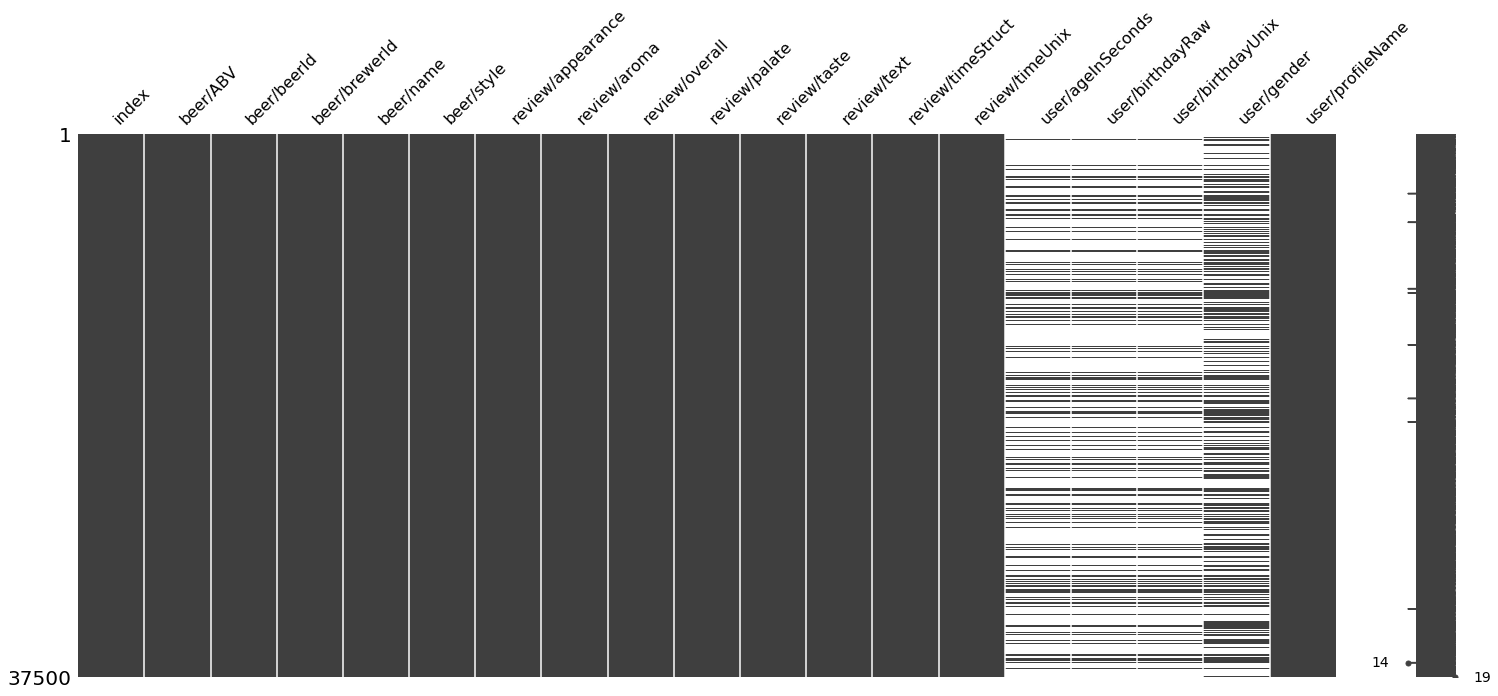

In [166]:
# Using this matrix you can very quickly find the pattern of missingness in the dataset.
msno.matrix(df_full) 

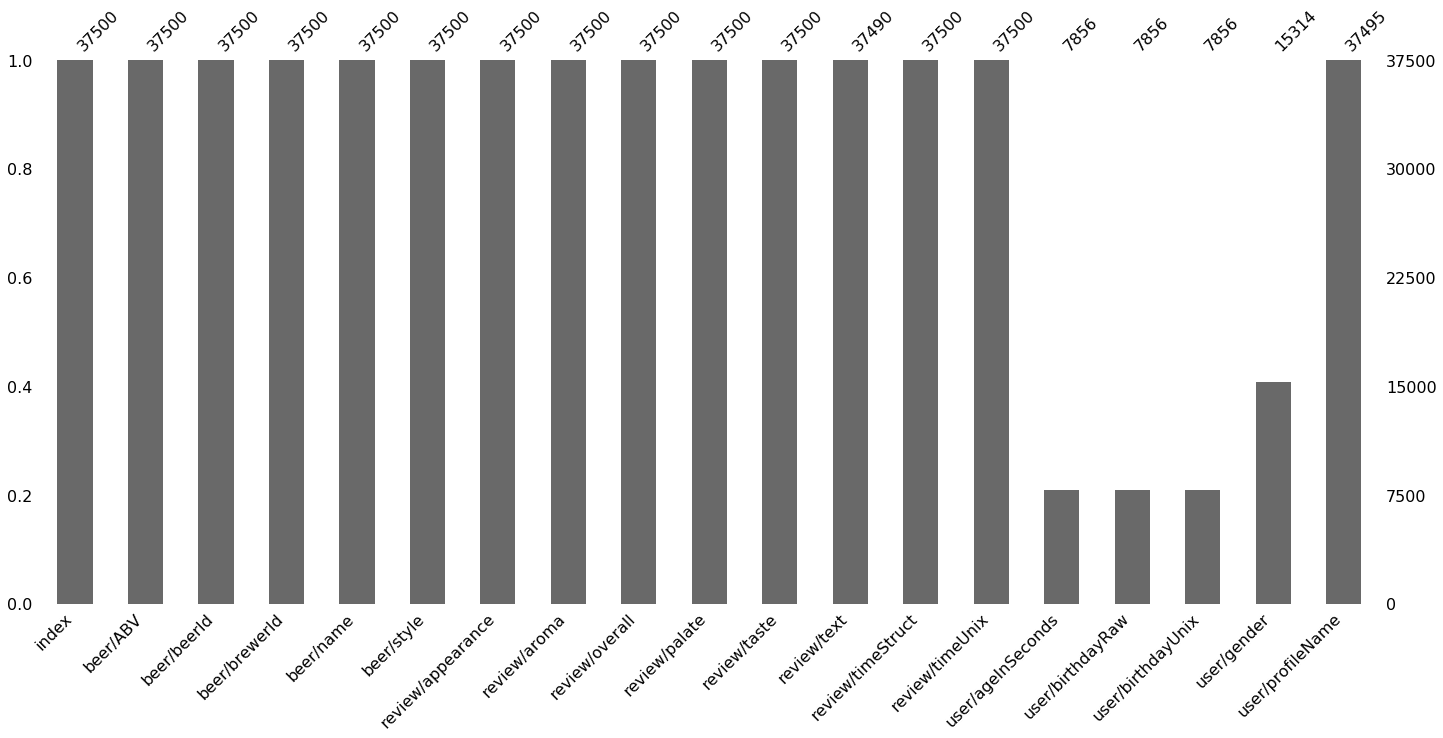

In [167]:
# This bar chart gives you an idea about how many missing values are there in each column.
msno.bar(df_full) 

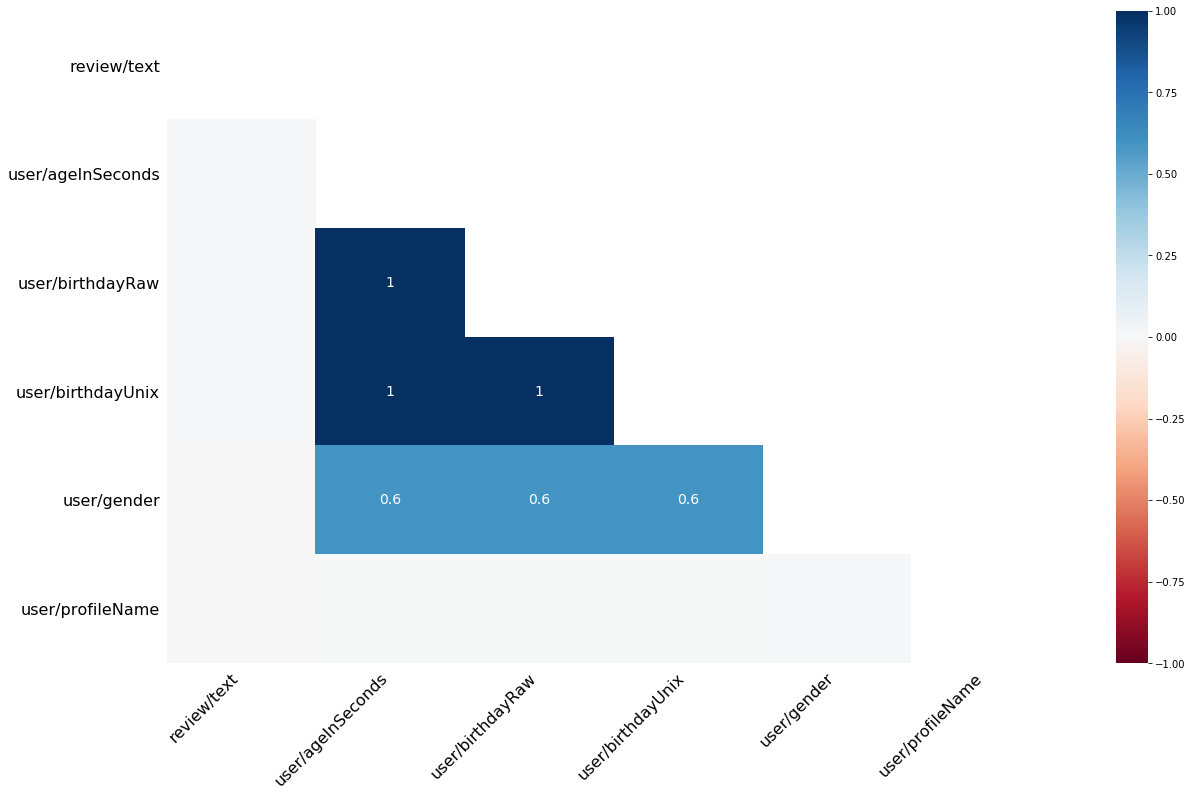

In [168]:
# Visualize the correlation between the number of 
# missing values in different columns as a heatmap 
msno.heatmap(df_full) 

In [169]:
df_full.drop('user/ageInSeconds', axis=1, inplace=True)
df_full.drop('user/birthdayRaw', axis=1, inplace=True)
df_full.drop('user/birthdayUnix', axis=1, inplace=True)
df_full.drop('user/gender', axis=1, inplace=True)

In [170]:
df_full.drop('index', axis=1, inplace=True)
df_full.drop('beer/beerId', axis=1, inplace=True)
df_full.drop('beer/brewerId', axis=1, inplace=True)

In [171]:
df_full.drop('user/profileName', axis=1, inplace=True)
df_full.drop('review/text', axis=1, inplace=True)
df_full.drop('review/timeStruct', axis=1, inplace=True)
df_full.head()

,beer/ABV,beer/name,beer/style,review/appearance,review/aroma,review/overall,review/palate,review/taste,review/timeUnix
0,5.0,Chiostro,Herbed / Spiced Beer,4.0,4.0,4.0,4.0,4.0,1229398690
1,11.0,Bearded Pat's Barleywine,American Barleywine,4.0,3.5,3.5,3.5,3.0,1218238738
2,4.7,Naughty Nellie's Ale,American Pale Ale (APA),3.5,4.0,3.5,3.5,3.5,1101492422
3,4.4,Pilsner Urquell,Czech Pilsener,3.0,3.0,2.5,3.0,3.0,1308532025
4,4.4,Black Sheep Ale (Special),English Pale Ale,4.0,3.0,3.0,3.5,2.5,1299912708


In [172]:

import datetime
time = []
for i in df_full['review/timeUnix']:
    time.append(datetime.datetime.fromtimestamp(int(i)).strftime('%Y-%m-%d %H:%M:%S'))
    
time = pd.DataFrame(time)
time.head()

,0
0,2008-12-16 09:08:10
1,2008-08-09 05:08:58
2,2004-11-26 23:37:02
3,2011-06-20 06:37:05
4,2011-03-12 12:21:48


In [173]:
df_full.drop('review/timeUnix', axis=1, inplace=True)

In [174]:
df_full.head(n=10)

,beer/ABV,beer/name,beer/style,review/appearance,review/aroma,review/overall,review/palate,review/taste
0,5.0,Chiostro,Herbed / Spiced Beer,4.0,4.0,4.0,4.0,4.0
1,11.0,Bearded Pat's Barleywine,American Barleywine,4.0,3.5,3.5,3.5,3.0
2,4.7,Naughty Nellie's Ale,American Pale Ale (APA),3.5,4.0,3.5,3.5,3.5
3,4.4,Pilsner Urquell,Czech Pilsener,3.0,3.0,2.5,3.0,3.0
4,4.4,Black Sheep Ale (Special),English Pale Ale,4.0,3.0,3.0,3.5,2.5
5,10.0,YouEnjoyMyStout,Russian Imperial Stout,4.0,4.0,4.0,4.0,4.5
6,12.6,Benevolence,American Wild Ale,4.0,4.5,4.0,4.0,4.0
7,8.4,Frog's Hollow Double Pumpkin Ale,Pumpkin Ale,4.0,4.0,4.0,4.0,4.0
8,9.0,Stoudt's Barrel Aged Old Abominable,English Barleywine,4.5,4.0,4.5,4.5,4.5
9,6.2,One Hop Wonder IPA,American IPA,2.0,2.0,2.0,2.5,2.0


In [175]:
len(df_full['beer/name'].unique())

1688

In [176]:
len(df_full['beer/style'].unique())

95

In [177]:
style = df_full['beer/style'].unique()

for i in range(len(style)):
    style[i]= i

In [178]:
style

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52,
       53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69,
       70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86,
       87, 88, 89, 90, 91, 92, 93, 94], dtype=object)

In [179]:
df_full.drop('beer/name', axis=1, inplace=True)
df_full.drop('beer/style', axis=1, inplace=True)

In [180]:
df_full.describe()

,beer/ABV,review/appearance,review/aroma,review/overall,review/palate,review/taste
count,37500.000000,37500.000000,37500.000000,37500.00000,37500.000000,37500.000000
mean,7.403725,3.900053,3.873240,3.88944,3.854867,3.922440
std,2.318145,0.588778,0.680865,0.70045,0.668068,0.716504
min,0.100000,0.000000,1.000000,0.00000,1.000000,1.000000
25%,5.400000,3.500000,3.500000,3.50000,3.500000,3.500000
50%,6.900000,4.000000,4.000000,4.00000,4.000000,4.000000
75%,9.400000,4.500000,4.500000,4.50000,4.500000,4.500000
max,57.700000,5.000000,5.000000,5.00000,5.000000,5.000000


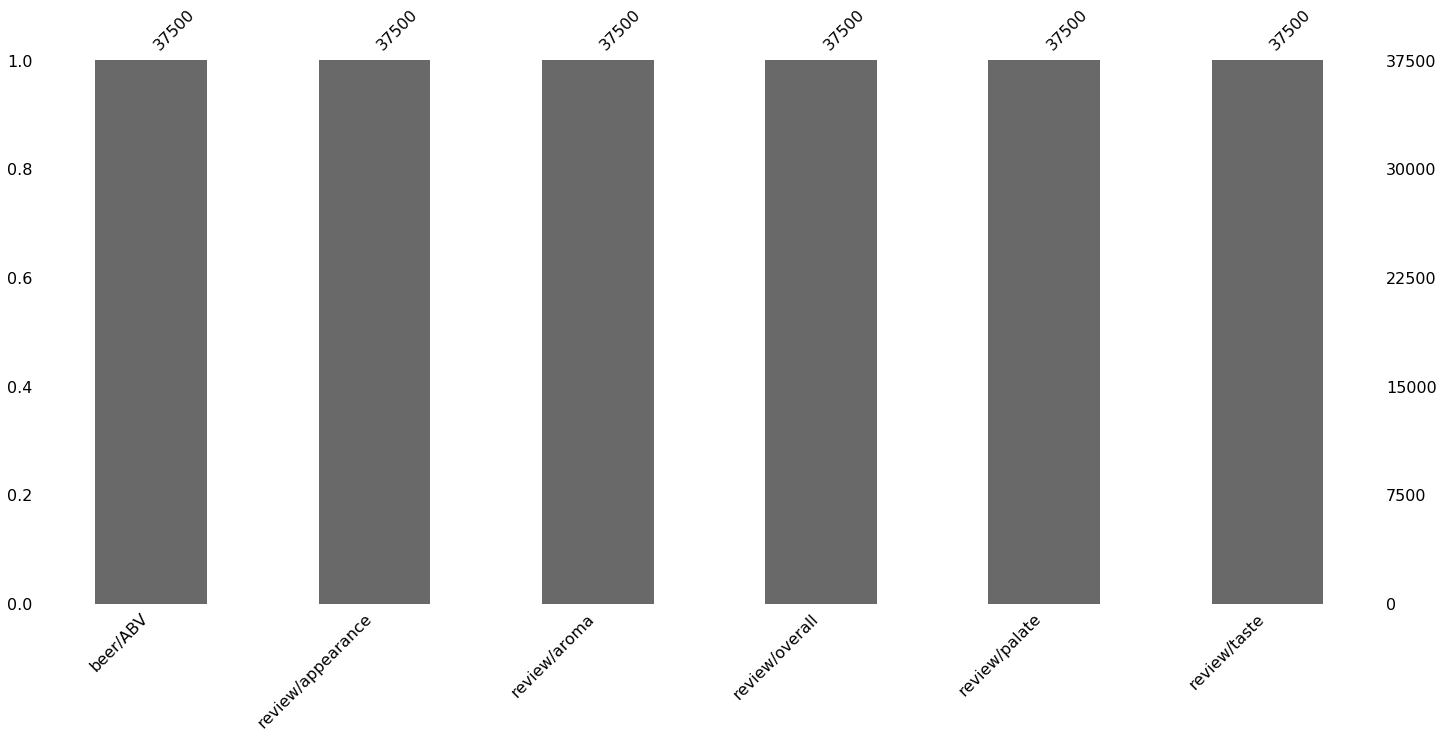

In [183]:
msno.bar(df_full) 

In [185]:
df_full.head()

,beer/ABV,review/appearance,review/aroma,review/overall,review/palate,review/taste
0,5.0,4.0,4.0,4.0,4.0,4.0
1,11.0,4.0,3.5,3.5,3.5,3.0
2,4.7,3.5,4.0,3.5,3.5,3.5
3,4.4,3.0,3.0,2.5,3.0,3.0
4,4.4,4.0,3.0,3.0,3.5,2.5


# Split

In [186]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df_full, test_size=0.2, random_state=42, shuffle=True)

In [187]:
train

,beer/ABV,review/appearance,review/aroma,review/overall,review/palate,review/taste
31243,5.8,4.0,3.5,4.0,3.5,4.0
36885,5.2,3.5,3.5,4.0,3.5,3.5
37423,5.7,3.5,3.0,3.0,2.5,3.5
6148,8.3,4.5,4.5,5.0,4.0,4.5
23245,9.4,4.0,4.5,4.5,4.0,4.0
...,...,...,...,...,...,...
16850,8.5,4.0,4.0,4.5,3.5,3.5
6265,4.4,4.0,4.5,4.5,5.0,4.0
11284,5.1,4.0,4.0,4.0,4.0,3.5
860,5.3,3.5,3.5,3.5,3.5,3.5


In [188]:
test

,beer/ABV,review/appearance,review/aroma,review/overall,review/palate,review/taste
24985,4.70,3.5,4.0,4.0,4.0,4.0
19125,4.40,3.5,3.5,4.0,4.0,3.5
3077,7.00,4.0,3.5,2.5,3.5,1.5
24526,9.00,4.5,4.5,5.0,4.0,4.5
32428,4.19,3.5,4.0,3.0,3.5,3.0
...,...,...,...,...,...,...
8393,5.70,4.0,4.0,4.0,4.0,4.0
3989,10.50,4.5,4.5,4.5,4.5,4.5
5941,8.50,4.0,4.0,4.0,4.0,4.5
28072,11.20,4.5,5.0,5.0,5.0,5.0


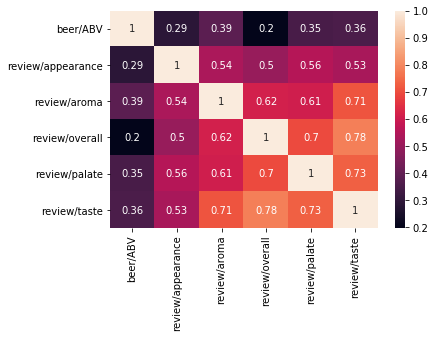

In [189]:
sb.heatmap(train.corr(), annot=True)
plt.show()

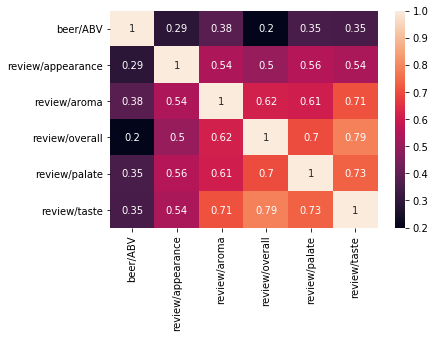

In [191]:
sb.heatmap(test.corr(), annot=True)
plt.show()

In [194]:
NN_model = Sequential()

# The Input Layer :
NN_model.add(Dense(128, kernel_initializer='normal',input_dim = train.shape[1], activation='relu'))

# The Hidden Layers :
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))

# The Output Layer :
NN_model.add(Dense(1, kernel_initializer='normal',activation='linear'))

# Compile the network :
NN_model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_error', 'mean_absolute_error', 'mean_absolute_percentage_error', 'cosine_proximity'])
NN_model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 128)               896       
_________________________________________________________________
dense_12 (Dense)             (None, 256)               33024     
_________________________________________________________________
dense_13 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_14 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 257       
Total params: 165,761
Trainable params: 165,761
Non-trainable params: 0
_________________________________________________________________


In [195]:
# Define a checkpoint callback :
checkpoint_name = 'Weights-{epoch:03d}--{val_loss:.5f}.hdf5' 
checkpoint = ModelCheckpoint(checkpoint_name, monitor='val_loss', verbose = 1, save_best_only = True, mode ='auto')
callbacks_list = [checkpoint]

In [198]:
target = train['review/overall']

In [199]:
NN_model.fit(train, target, epochs=500, batch_size=32, validation_split = 0.2, callbacks=callbacks_list)

Train on 24000 samples, validate on 6000 samples
Epoch 1/500
24000/24000 [==============================] - 3s 144us/step - loss: 7.3154e-04 - mean_squared_error: 7.3154e-04 - mean_absolute_error: 0.0174 - mean_absolute_percentage_error: 2898.7783 - cosine_proximity: 1.0000 - val_loss: 9.2972e-05 - val_mean_squared_error: 9.2972e-05 - val_mean_absolute_error: 0.0086 - val_mean_absolute_percentage_error: 0.2338 - val_cosine_proximity: 1.0000

Epoch 00001: val_loss did not improve from 0.00006
Epoch 2/500
24000/24000 [==============================] - 3s 140us/step - loss: 4.5641e-04 - mean_squared_error: 4.5641e-04 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 8750.9990 - cosine_proximity: 1.0000 - val_loss: 2.2925e-04 - val_mean_squared_error: 2.2925e-04 - val_mean_absolute_error: 0.0054 - val_mean_absolute_percentage_error: 0.1468 - val_cosine_proximity: 1.0000

Epoch 00002: val_loss did not improve from 0.00006
Epoch 3/500
24000/24000 [==============================

In [200]:
wights_file = 'Weights-398--0.00000.hdf5' # choose the best checkpoint 
NN_model.load_weights(wights_file) # load it
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_squared_error', 'mean_absolute_error', 'mean_absolute_percentage_error', 'cosine_proximity'])

In [201]:
test.to_csv("test_new.csv")

In [202]:
train.to_csv("train_new.csv")

In [203]:
predictions = NN_model.predict(test)

In [204]:
prediction = pd.DataFrame(predictions)
prediction.columns = ['Predicted Overall Rating']
prediction

,Predicted Overall Rating
0,3.999924
1,3.999993
2,2.500303
3,4.999864
4,3.000003
...,...
7495,3.999908
7496,4.499997
7497,3.999866
7498,5.000013


In [205]:
pd.DataFrame(predictions).to_csv("Predictions.csv")

#  Try another ML algorithms (Random Forest)

In [220]:
train_X, val_X, train_y, val_y = train_test_split(train, target, test_size = 0.25, random_state = 14)

In [221]:
model = RandomForestRegressor()
model.fit(train_X,train_y)

# Get the mean absolute error on the validation data
predicted_prices = model.predict(val_X)
MAE = mean_absolute_error(val_y , predicted_prices)
print('Random forest validation MAE = ', MAE)

Random forest validation MAE =  0.0


In [222]:
predicted_rating_by_RF = model.predict(test)
pd.DataFrame(predicted_rating_by_RF).to_csv("Prediction_by_RF.csv")

# Try anogther ML Algorithm (XG Boost)

In [224]:
XGBModel = XGBRegressor()
XGBModel.fit(train_X,train_y , verbose=False)

# Get the mean absolute error on the validation data :
XGBpredictions = XGBModel.predict(val_X)
MAE = mean_absolute_error(val_y , XGBpredictions)
print('XGBoost validation MAE = ',MAE)

XGBoost validation MAE =  5.744171142578125e-06


In [228]:
XGBpredictions = XGBModel.predict(test)
pd.DataFrame(XGBpredictions).to_csv("Prediction_by_XGB.csv")